In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
dataset = pd.DataFrame(data.data,columns=data.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


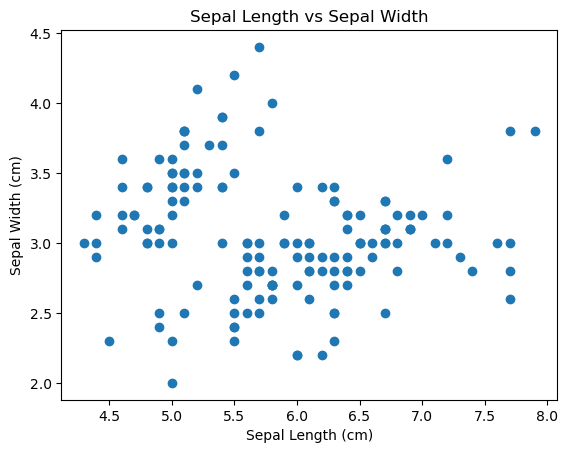

In [9]:
# Ensure correct column names and syntax
df = dataset[['sepal length (cm)', 'sepal width (cm)']]

# Plot the scatter plot
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()


In [11]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3)


In [14]:
X = df.values
X = nbrs.fit(X)

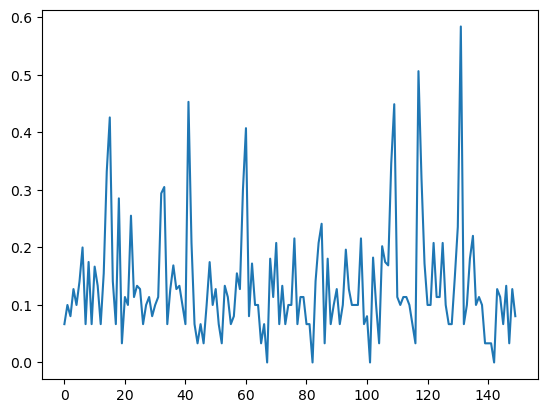

In [15]:
distances, indexes = X.kneighbors()
plt.plot(distances.mean(axis=1))

In [16]:
outliers = np.where(distances.mean(axis=1)> 0.25)
outliers


(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131], dtype=int64),)

In [23]:
outliers_df = df.iloc[outliers]

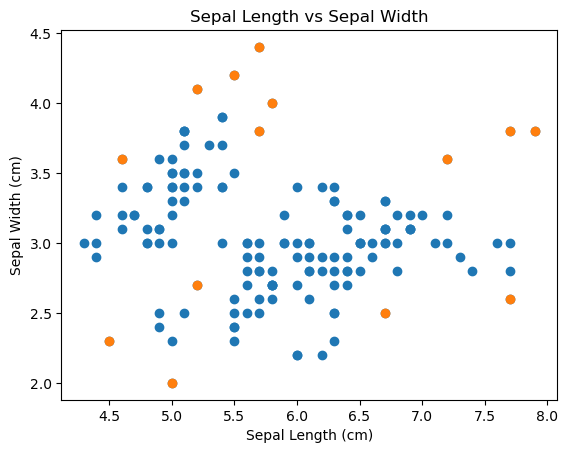

In [24]:
# Plot the scatter plot
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.scatter(outliers_df['sepal length (cm)'],outliers_df['sepal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()
